In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [28]:
df_employee=pd.read_csv('Human_Resources.csv')
pd.options.display.max_columns = None
df_employee
#data structure:have 1470 rows ,35 columns


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [71]:
df_employee.dtypes
#we only have 2 datatypes factors and integers

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
df_info=df_employee.describe()
df_info
#the std of employeeCount and standardHours are 0 ,we'll remove them

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [29]:
#convert categorical variables to numerical variables
df_employee['Attrition']=df_employee['Attrition'].map({'Yes': 1, 'No': 0})
df_employee['OverTime']=df_employee['OverTime'].map({'Yes': 1, 'No': 0})
df_employee[['Attrition','OverTime']]

,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0
...,...,...
1465,0,0
1466,0,0
1467,0,1
1468,0,0


In [6]:
df_employee['Over18'].unique()
#we'll drop over 18 column cause it add no meaningful value

array([1], dtype=int64)

In [30]:
df_employee.drop(['EmployeeCount','StandardHours','EmployeeNumber','Over18'],axis=1,inplace=True)
df_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [87]:
#checking for missing value
df_employee.isna().any().any() # or df_employee.isna()
#or df_employee.isna().sum()/(len(df_employee))*100 to check for missing values frequency in each column

False

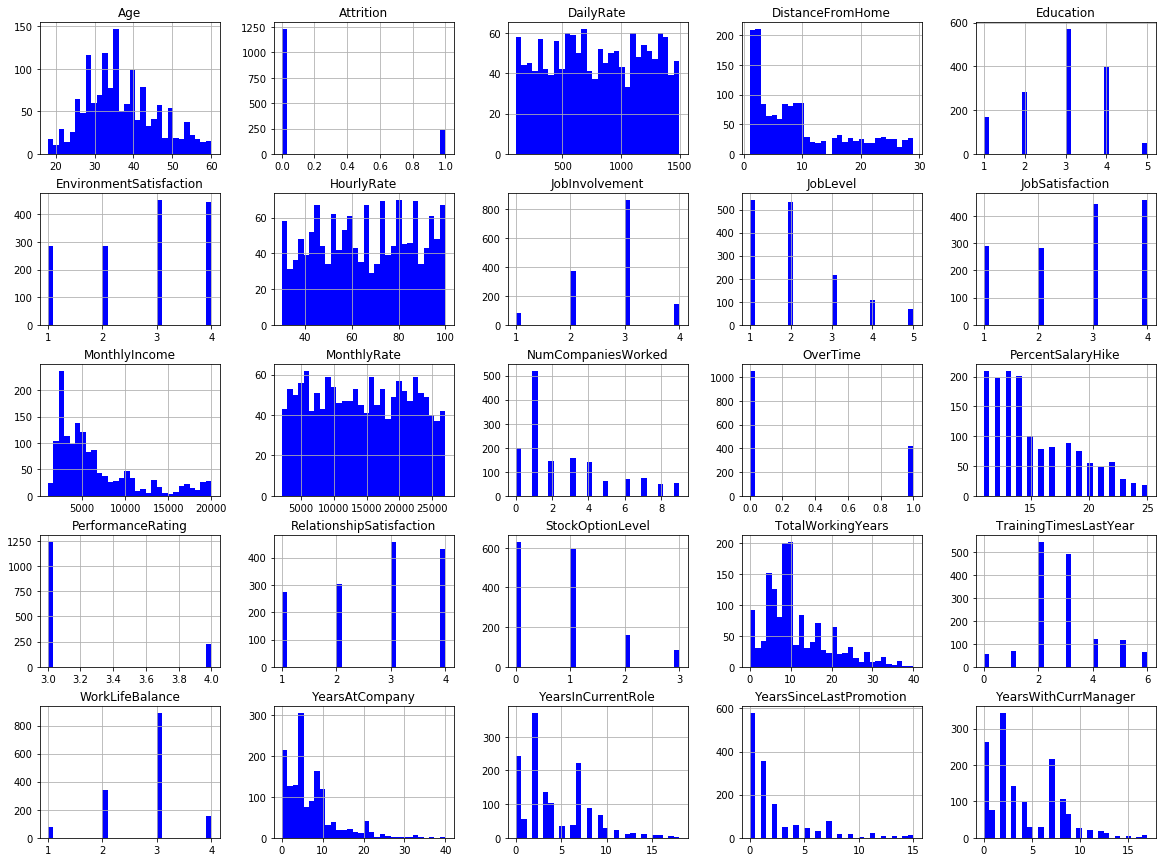

In [31]:
df_employee.hist(bins=30,figsize=(20,15),color='b')
plt.show()
#84%(1237) employees stay in the company while 16% (237)leaves
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
#job level column represent no useful information

In [106]:
employee_stayed=df_employee[df_employee['Attrition']==0]
employee_left=df_employee[df_employee['Attrition']==1]

In [123]:
print("Total employee numbers =", len(df_employee))
print('--------------------------------------------')
print("Total employees who left the company =", len(employee_left),", Percentage =",round((len(employee_left)/len(df_employee)*100.0),2) , "%")
print('--------------------------------------------') 
print("Total employees who stayed =", len(employee_stayed),", Percentage  =", round(len(employee_stayed)/len(df_employee)*100.0,2), "%")

Total employee numbers = 1470
--------------------------------------------
Total employees who left the company = 237 , Percentage = 16.12 %
--------------------------------------------
Total employees who stayed = 1233 , Percentage  = 83.88 %


In [129]:
employee_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [130]:
employee_left.describe()
# 'age': the average age of employees who stayed is higher than who the employees who left the company
# 'DailyRate': employees who stayed have higher salary 
# 'DistanceFromHome': employees who left live 10km away far from those who stayed(8km) 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
#we notice that those who stayed have higher means values than those who left

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


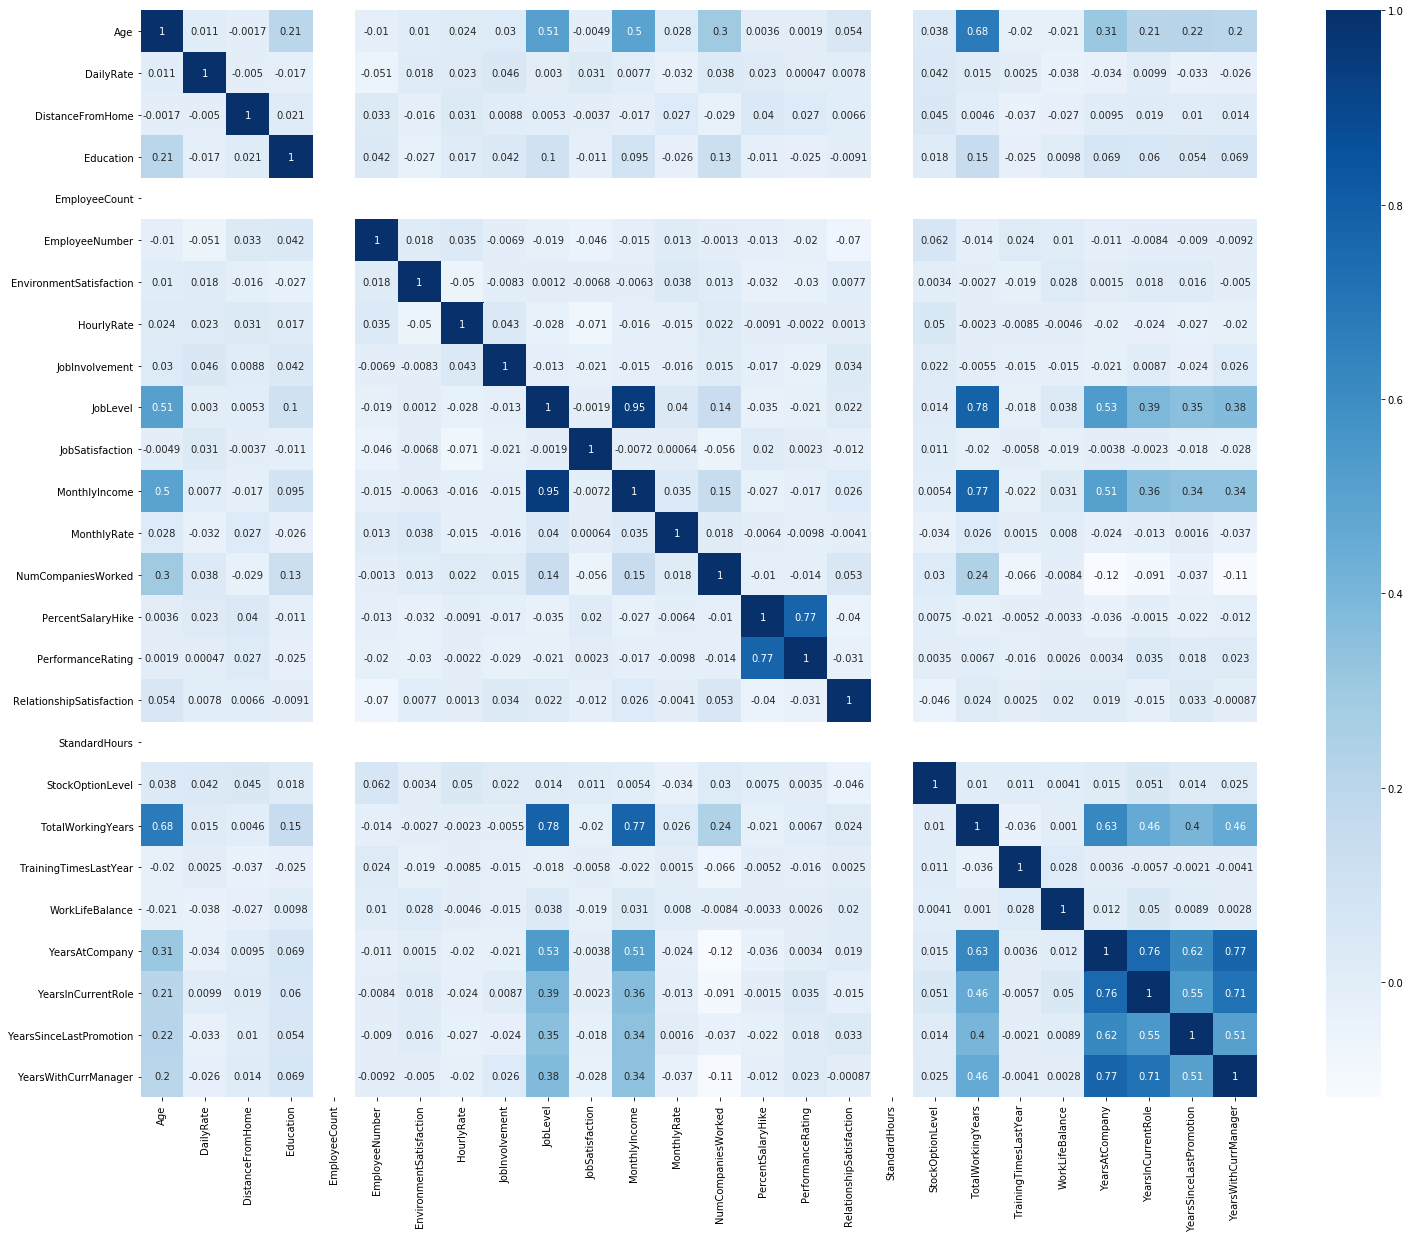

In [139]:
correl=df_employee.corr()
f, ax = plt.subplots(figsize = (25, 20))
sns.heatmap(correl, cmap="Blues",annot=True)
#the darker the color the better(the more correlated)
# Job level is strongly correlated with TotalWorking years& monthly income
# Monthly income is strongly correlated with Job level&TotalWorking years
#the employees that works longer for a company tend to have higher joblevel(from junior profile to senior profile)

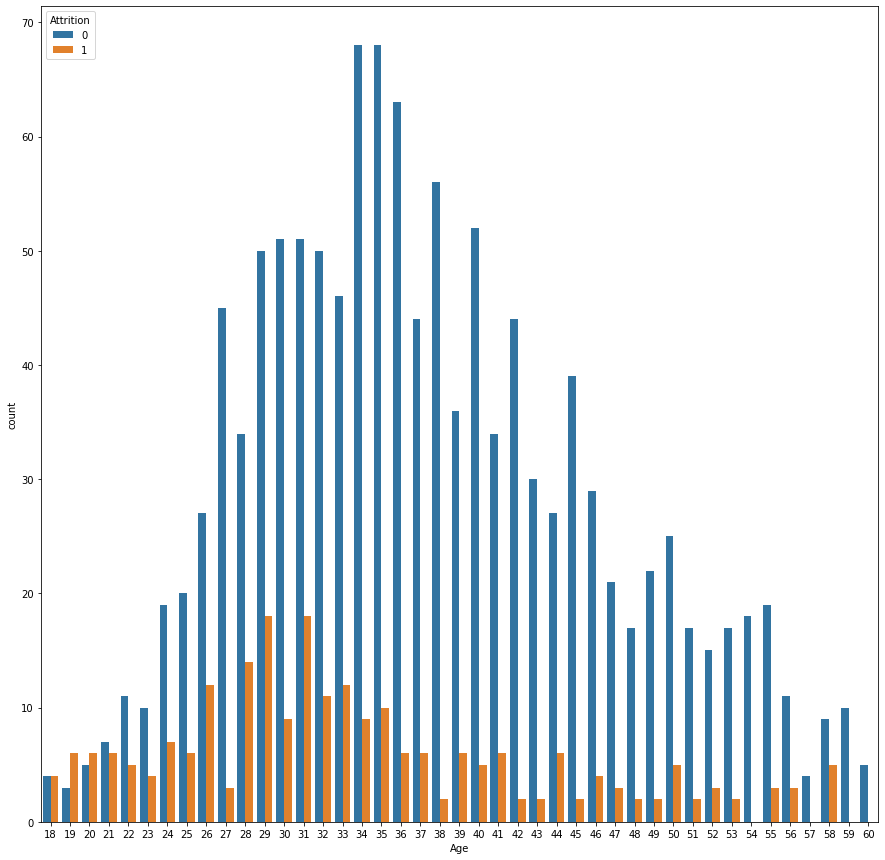

In [142]:
plt.figure(figsize=(15,15))
sns.countplot(x='Age',hue='Attrition',data=df_employee)

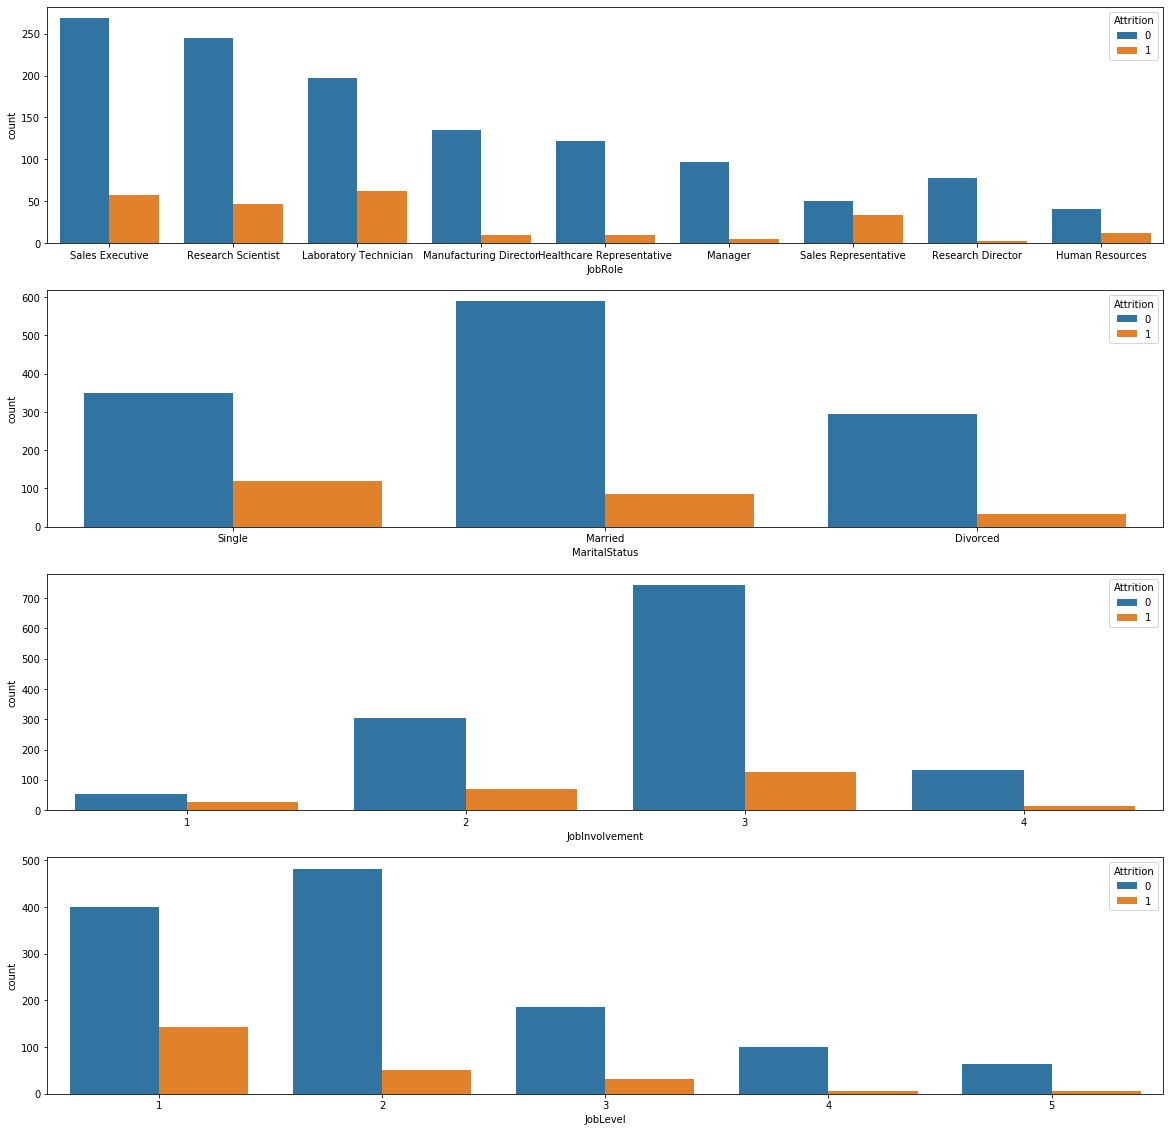

In [152]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df_employee)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df_employee)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df_employee)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df_employee)
#research director tend to stay while sales representative tend to leave
#single employees are more likely to leave
#employees who are more involeved in the job tend to stay
#the more experience the employees get,they highly unlikely have tendency to leave

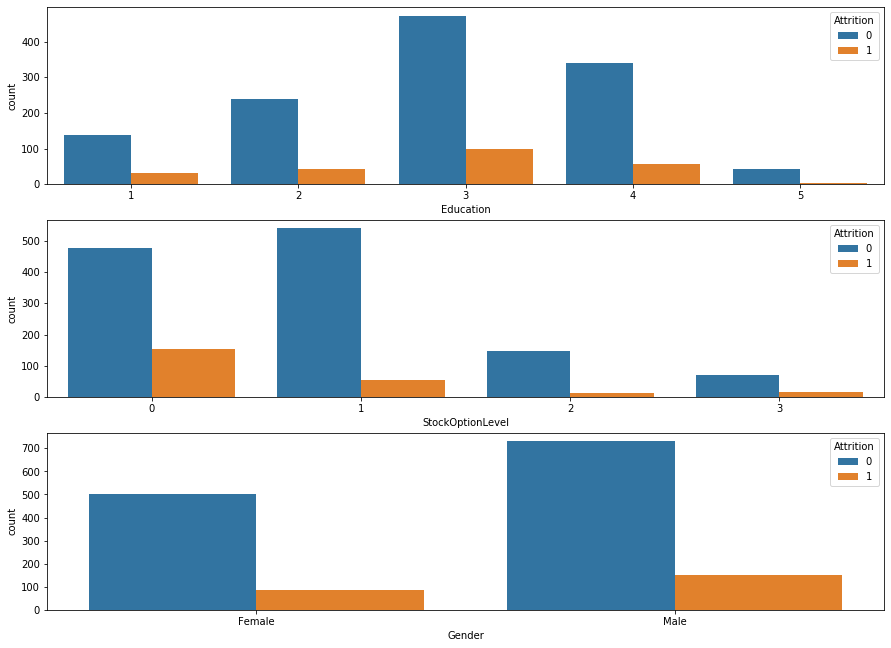

In [166]:
plt.figure(figsize=[15,15])
plt.subplot(411)
sns.countplot(x = 'Education', hue = 'Attrition', data = df_employee)
plt.subplot(412)
sns.countplot(x = 'StockOptionLevel', hue = 'Attrition', data = df_employee)
plt.subplot(413)
sns.countplot(x = 'Gender', hue = 'Attrition', data = df_employee)
#men slighty tend to leave more than women

Text(0.5, 0, 'Distance From Home')

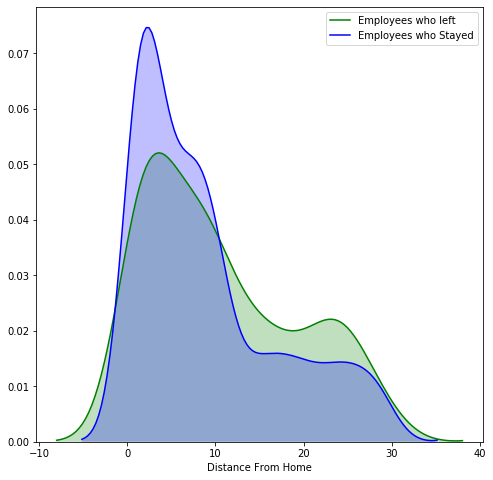

In [169]:
#KDE :probability visualisation for distance from home
plt.figure(figsize=(8,8))

sns.kdeplot(employee_left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'g')
sns.kdeplot(employee_stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')
plt.xlabel('Distance From Home')
#we assume that there's a correlation between distance from home and employee attrition

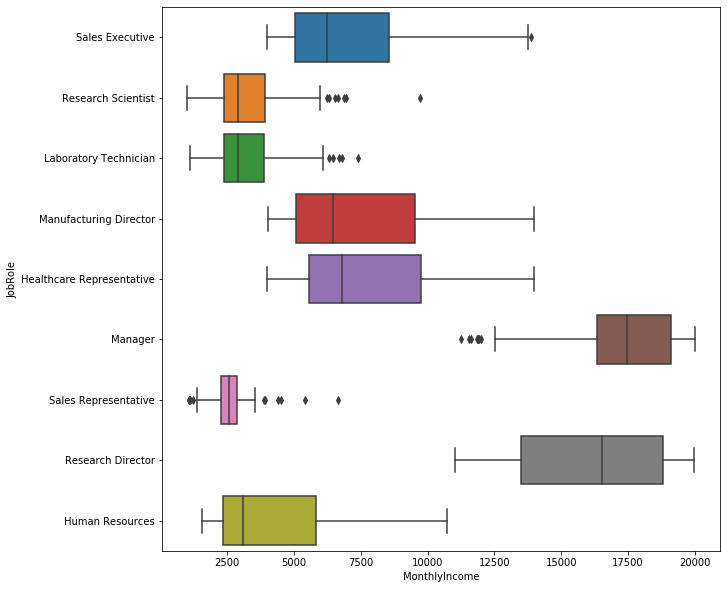

In [173]:
plt.figure(figsize=(10,10))
sns.boxplot(x='MonthlyIncome',y='JobRole', data=df_employee)

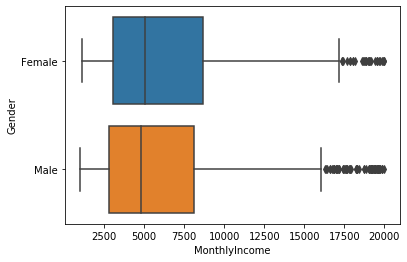

In [10]:
#are there any gender disparities in income
sns.boxplot(x='MonthlyIncome',y='Gender', data=df_employee)
#the average salary for fenales and male is practically the same

In [11]:
X_categorical = df_employee[['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus']]
X_categorical

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


We can use onehotencoder to convert categorical values to numerical valus:
//
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
onehotencoder = OneHotEncoder()
onehotencoder.fit(X_categorical)
X_new= onehotencoder.transform(X_categorical).toarray()
X_new=pd.DataFrame(X_new)
//

In [32]:
#or use get_dummies() method
X_num_cat = pd.get_dummies(df_employee)
X_num_cat

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [40]:
y=df_employee['Attrition']
X=X_num_cat.drop(['Attrition'],axis=1)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
#Scale the data:to treat all the features equally
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_num_cat)
X
#now we have bunch of numbers between(0,1)

array([[0.54761905, 1.        , 0.71581961, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.        , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.        , 0.65926986, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.37652112, ..., 0.        , 1.        ,
        0.        ]])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=1)
print("X train shape:", X_train.shape,"\nX_test shape:",X_test.shape)

X train shape: (1176, 50) 
X_test shape: (294, 50)


In [49]:
#logistic regression classifier:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

def ml_model(Model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("Accuray of",Model,"model is:",round(accuracy_score(y_pred,y_test)*100,2),"%")
    cm = confusion_matrix(y_pred, y_test)
    print("Confusion matrix:\n",cm)
    print("Classification report:\n",classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True ,cmap="viridis")
    plt.show()

Accuray of Logistic Regression model is: 84.35 %
Confusion matrix:
 [[232  42]
 [  4  16]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       236
           1       0.80      0.28      0.41        58

    accuracy                           0.84       294
   macro avg       0.82      0.63      0.66       294
weighted avg       0.84      0.84      0.81       294



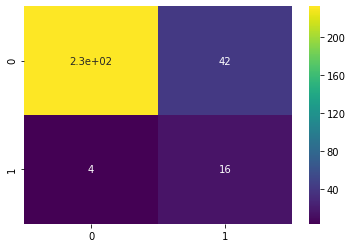

In [54]:
#logistic regression classifier:
Model="Logistic Regression"
model=LogisticRegression(solver='liblinear')
ml_model(Model)

Accuray of Random forest classifier model is: 82.99 %
Confusion matrix:
 [[233  47]
 [  3  11]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.79      0.19      0.31        58

    accuracy                           0.83       294
   macro avg       0.81      0.59      0.60       294
weighted avg       0.82      0.83      0.79       294



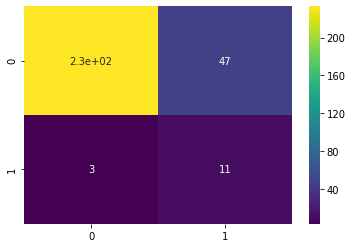

In [51]:
#Random forest classifier:

from sklearn.ensemble import RandomForestClassifier
Model="Random forest classifier"
model= RandomForestClassifier(n_estimators=10)
ml_model(Model)

Accuray of SVC model is: 80.27 %
Confusion matrix:
 [[236  58]
 [  0   0]]
Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89       236
           1       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294



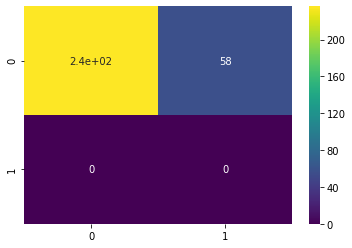

In [50]:
#SVC model
from sklearn.svm import SVC 
Model= "SVC"
model=SVC()
ml_model(Model)

Accuray of XGBClassifier() model is: 83.67 %
Confusion matrix:
 [[229  41]
 [  7  17]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       236
           1       0.71      0.29      0.41        58

    accuracy                           0.84       294
   macro avg       0.78      0.63      0.66       294
weighted avg       0.82      0.84      0.81       294



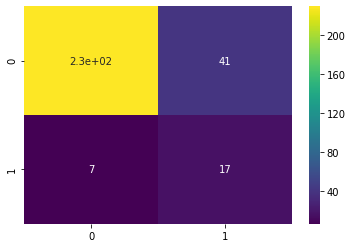

In [52]:
#XGBOOST Classifier model:
Model = "XGBClassifier()"
model=XGBClassifier()
ml_model(Model)

Accuray of KNeighborsClassifier model is: 79.59 %
Confusion matrix:
 [[225  49]
 [ 11   9]]
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       236
           1       0.45      0.16      0.23        58

    accuracy                           0.80       294
   macro avg       0.64      0.55      0.56       294
weighted avg       0.75      0.80      0.75       294



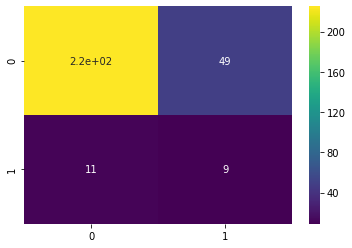

In [53]:
#KNN model:
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()
ml_model(Model)

Accuray of SGDClassifier model is: 83.67 %
Confusion matrix:
 [[220  32]
 [ 16  26]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       236
           1       0.62      0.45      0.52        58

    accuracy                           0.84       294
   macro avg       0.75      0.69      0.71       294
weighted avg       0.82      0.84      0.83       294



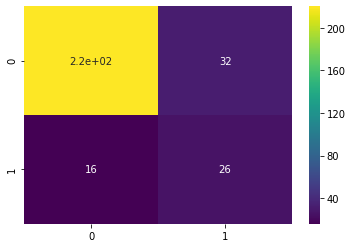

In [56]:
#SGDClassifier
Model = "SGDClassifier"
model=SGDClassifier()
ml_model(Model)

Accuray of LinearDiscriminantAnalysis model is: 84.69 %
Confusion matrix:
 [[229  38]
 [  7  20]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       236
           1       0.74      0.34      0.47        58

    accuracy                           0.85       294
   macro avg       0.80      0.66      0.69       294
weighted avg       0.83      0.85      0.82       294



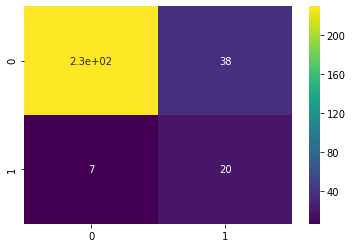

In [57]:
#LDA:
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()
ml_model(Model)

Accuray of AdaBoostClassifier model is: 82.65 %
Confusion matrix:
 [[223  38]
 [ 13  20]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.90       236
           1       0.61      0.34      0.44        58

    accuracy                           0.83       294
   macro avg       0.73      0.64      0.67       294
weighted avg       0.81      0.83      0.81       294



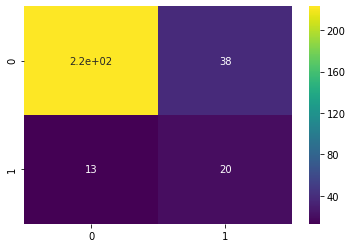

In [58]:
#AdaBoost Classifier
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()
ml_model(Model)

In [375]:
#Artificial neural network classifier:
#we'll use google's framework :tensorflow  and API keras to build artificial networks
import tensorflow as tf

In [376]:
ANN_mdl = tf.keras.models.Sequential()#build our model in a sequential network
ANN_mdl.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))#1st layer
ANN_mdl.add(tf.keras.layers.Dense(units=500, activation='relu'))#next layer
ANN_mdl.add(tf.keras.layers.Dense(units=500, activation='relu'))
ANN_mdl.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))#sigmoid function so the output won't be continuous as we do classification


In [377]:
ANN_mdl.summary()
#we have ~half million parameters to tune(weights)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [378]:
ANN_mdl.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [379]:
epochs = ANN_mdl.fit(X_train, y_train, epochs = 150, batch_size = 50)

Train on 1176 samples
Epoch 1/150
1176/1176 [==============================] - 0s 417us/sample - loss: 0.4066 - accuracy: 0.8486
Epoch 2/150
1176/1176 [==============================] - 0s 81us/sample - loss: 0.3183 - accuracy: 0.8801
Epoch 3/150
1176/1176 [==============================] - 0s 82us/sample - loss: 0.3015 - accuracy: 0.8835
Epoch 4/150
1176/1176 [==============================] - 0s 79us/sample - loss: 0.2657 - accuracy: 0.9039
Epoch 5/150
1176/1176 [==============================] - 0s 81us/sample - loss: 0.2305 - accuracy: 0.9184
Epoch 6/150
1176/1176 [==============================] - 0s 81us/sample - loss: 0.2075 - accuracy: 0.9235
Epoch 7/150
1176/1176 [==============================] - 0s 84us/sample - loss: 0.1752 - accuracy: 0.9362
Epoch 8/150
1176/1176 [==============================] - 0s 93us/sample - loss: 0.1428 - accuracy: 0.9507
Epoch 9/150
1176/1176 [==============================] - 0s 89us/sample - loss: 0.1200 - accuracy: 0.9549
Epoch 10/150
1176/1176 

1176/1176 [==============================] - 0s 156us/sample - loss: 1.2157e-06 - accuracy: 1.0000
Epoch 147/150
1176/1176 [==============================] - 0s 128us/sample - loss: 1.1865e-06 - accuracy: 1.0000
Epoch 148/150
1176/1176 [==============================] - 0s 122us/sample - loss: 1.1591e-06 - accuracy: 1.0000
Epoch 149/150
1176/1176 [==============================] - 0s 121us/sample - loss: 1.1316e-06 - accuracy: 1.0000
Epoch 150/150
1176/1176 [==============================] - 0s 127us/sample - loss: 1.1015e-06 - accuracy: 1.0000


In [380]:
y_pred = ANN_mdl.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

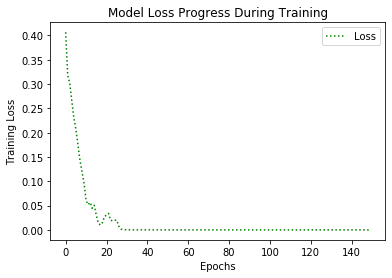

In [381]:
#visualize progress for training for the loss &accuracy
plt.plot(epochs.history['loss'],color='green',linestyle='dotted')
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Loss'])

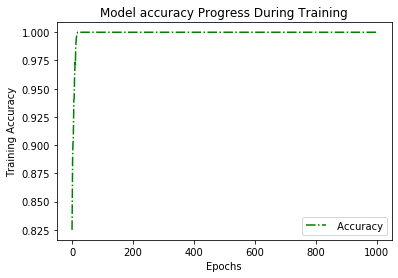

In [382]:
plt.plot(epochs_hist.history['accuracy'],color='green',linestyle='dashdot')
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend([' Accuracy'])

Confusion Matrix 
 [[215  21]
 [ 35  23]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       236
           1       0.52      0.40      0.45        58

    accuracy                           0.81       294
   macro avg       0.69      0.65      0.67       294
weighted avg       0.79      0.81      0.80       294



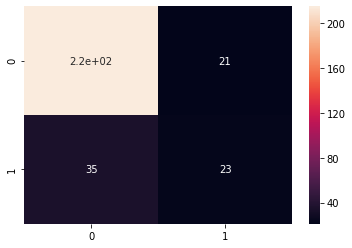

In [384]:
cm_2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",cm_2)
print("Classification report:\n",classification_report(y_test, y_pred))
sns.heatmap(cm_2, annot=True)